In [3]:
import sklearn
sklearn.__version__

'1.2.2'

In [6]:
!pip3 install sklearn

In [9]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 22.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 10.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# 1. Linear Regression

## 공부 시간에 따른 시험 점수

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [8]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [9]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [10]:
X = dataset.iloc[:,:-1].values #처음부터 마지막 컬럼 직전까지의 데이터(독립 변수)

In [12]:
y = dataset.iloc[:,-1].values #마지막 컬럼 데이터(종속 변수 - 결과)

In [13]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg = LinearRegression()  #객체 생성

In [16]:
reg.fit(X,y) #학습(모델 생성) - fit method

LinearRegression()

In [18]:
y_pred = reg.predict(X) # X에 대한 예측값 출력 - predict method
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

시각화

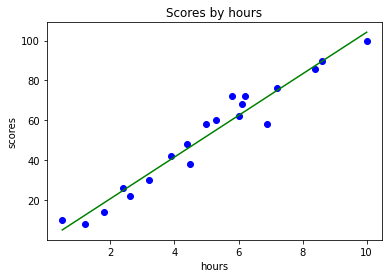

In [24]:
plt.scatter(X,y,color='blue') #산점도 그래프 - scatter method
plt.plot(X,y_pred, color='green')
plt.title('Scores by hours') 
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [26]:
print('9시간 공부했을 때 예상 점수:', reg.predict([[9]])) #[[x값]] - 2차원 배열

9시간 공부했을 때 예상 점수: [93.77478776]


In [29]:
print('7/8/9 시간 공부했을 때 예상 점수:', reg.predict([[9],[8],[7]])) 

7/8/9 시간 공부했을 때 예상 점수: [93.77478776 83.33109082 72.88739388]


In [30]:
reg.coef_ #기울기 m

array([10.44369694])

In [33]:
reg.intercept_ # y절편 b

-0.218484702867201

y = mx + b 
-> y = 10.4436x - 0.2185

### 데이터 세트 분리

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [37]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) #훈련80, 테스트 20 분리

In [43]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [44]:
X_train, len(X_train) #훈련세트 X

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [45]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [46]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [47]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

In [48]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

### 분리된 데이터를 통한 모델링

In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [50]:
reg.fit(X_train, y_train)  #훈련세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

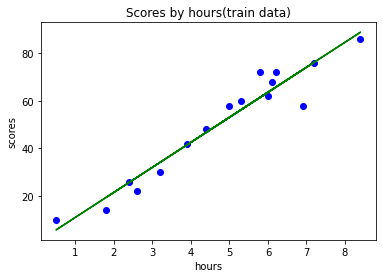

In [52]:
plt.scatter(X_train,y_train,color='blue') #산점도 그래프 - scatter method
plt.plot(X_train,reg.predict(X_train), color='green')
plt.title('Scores by hours(train data)') 
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

### 데이터 시각화 (테스트 테스트)

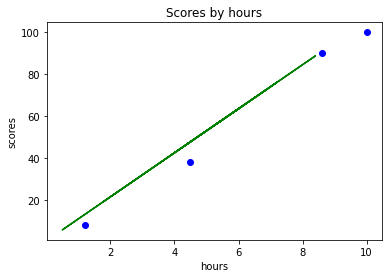

In [55]:
plt.scatter(X_test,y_test,color='blue') #산점도 그래프 - scatter method
plt.plot(X_train,reg.predict(X_train), color='green') #여기는 그대로 - 모델을 만들 때는 훈련 세트로 했기 때문
plt.title('Scores by hours') 
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [56]:
reg.coef_

array([10.49161294])

In [57]:
reg.intercept_

0.6115562905169369

### 모델 평가

In [59]:
reg.score(X_test,y_test) #테스트 세트를 통한 모델 평가 (0~1)

0.9727616474310156

In [60]:
reg.score(X_train,y_train) #train 세트를 통한 모델 평가 (0~1)

0.9356663661221668

## 경사 하강법 (Gradient Descent)

In [69]:
from sklearn.linear_model import SGDRegressor

sr = SGDRegressor()
sr.fit(X_train,y_train)

SGDRegressor()

### 데이터 시각화

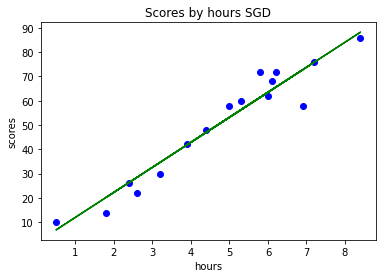

In [70]:
plt.scatter(X_train,y_train,color='blue') #산점도 그래프 - scatter method
plt.plot(X_train,sr.predict(X_train), color='green') #여기는 그대로 - 모델을 만들 때는 훈련 세트로 했기 때문
plt.title('Scores by hours SGD') 
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [71]:
sr.coef_

array([10.30141098])

In [72]:
sr.intercept_

array([1.68255713])

In [73]:
sr.score(X_test,y_test)

0.9719481454279794

In [74]:
sr.score(X_train,y_train)

0.9353028100680468